# Mapa do resultado do  2˚ Turno das Eleições Presidenciais de 2018 por Município

In [1]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import tarfile
from six.moves import urllib
import ssl
import progressbar
from zipfile import ZipFile

from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

ssl._create_default_https_context = ssl._create_unverified_context

class ProgressBar():
    def __init__(self):
        self.pbar = None

    def __call__(self, block_num, block_size, total_size):
        if not self.pbar:
            self.pbar = progressbar.ProgressBar(maxval=total_size)
            self.pbar.start()

        downloaded = block_num * block_size
        if downloaded < total_size:
            self.pbar.update(downloaded)
        else:
            self.pbar.finish()
            
def fetch_file_data(url, filename):
    dataset_path = os.path.join("datasets")
    
    if not os.path.isdir(dataset_path):
        os.makedirs(dataset_path)
        
    zip_path = os.path.join(dataset_path, filename)
    print("Downloading files...")
    urllib.request.urlretrieve(url, zip_path, ProgressBar())

def extract_file(file_path, extract_path):
    if not os.path.isdir(extract_path):
        os.makedirs(extract_path)
    with ZipFile(file_path, 'r') as zipObj:
        zipObj.extractall(extract_path)

## Baixa e extrai arquivos

In [2]:
# Baixa dados para definição do mapa
fetch_file_data(
    url="ftp://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2015/Brasil/BR/br_municipios.zip",
    filename="br_municipios.zip"
)

100% |########################################################################|


In [3]:
extract_file(
    file_path=os.path.join("datasets", "br_municipios.zip"),
    extract_path=os.path.join("datasets", "br_municipios")
)

In [ ]:
# Baixa dados da votação da eleição de 2018
fetch_file_data(
    url="http://agencia.tse.jus.br/estatistica/sead/odsele/votacao_candidato_munzona/votacao_candidato_munzona_2018.zip",
    filename="votacao_candidato_munzona_2018.zip"
)

In [ ]:
extract_file(
    file_path=os.path.join("datasets", "votacao_candidato_munzona_2018.zip"),
    extract_path=os.path.join("datasets", "votacao_candidato_munzona_2018")
)

## Inicia análise dos dados

### Carrega shapefile

In [2]:
# Carrega shapefile de mapa de municípios
df_map = gpd.read_file('./datasets/br_municipios/BRMUE250GC_SIR.shp')

In [3]:
df_map.head()

NM_MUNICIP CD_GEOCMU  \
0                      CAIUÃ   3509106   
1                    CASTILHO   3511003   
2                     DRACENA   3514403   
3            ESTRELA DO NORTE   3515301   
4  EUCLIDES DA CUNHA PAULISTA   3515350   

                                            geometry  
0  POLYGON ((-51.86001052999998 -21.5807199056459...  
1  POLYGON ((-51.41936432700003 -20.6810765586240...  
2  POLYGON ((-51.48515406800003 -21.4276462056422...  
3  POLYGON ((-51.57097467399996 -22.3988718766653...  
4  POLYGON ((-52.44569233499996 -22.6082794076701...

In [4]:
df_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
NM_MUNICIP    5572 non-null object
CD_GEOCMU     5572 non-null object
geometry      5572 non-null object
dtypes: object(3)
memory usage: 130.7+ KB


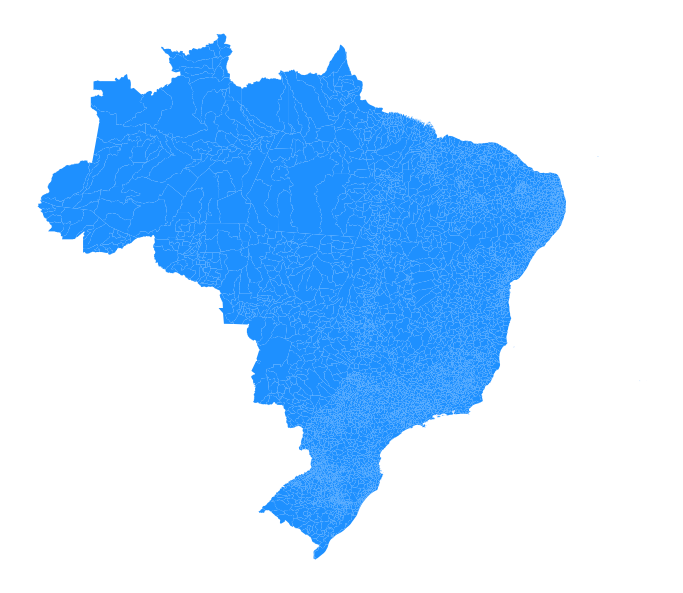

In [5]:
jtplot.style(theme='grade3')

# Expand figsize
fig, ax = plt.subplots(1, figsize=(12, 12))

# Draw map
df_map.plot(ax=ax, color='dodgerblue')

# Set axis off
ax.set_axis_off()

plt.show()

### Carrega resultados das eleições

In [6]:
# Carrega arquivo com resultado da eleição dividido por município/zona
df_voting = pd.read_csv(
    './datasets/votacao_candidato_munzona_2018/votacao_candidato_munzona_2018_BR.csv',
    sep=';', encoding='latin1'
)

df_voting.profile_report()

In [7]:
# Seleciona dados apenas do 2˚ turno
df_voting = df_voting[df_voting['NR_TURNO'] == 2]
df_voting.sample(3).T

66481  \
DT_GERACAO                                               14/10/2019   
HH_GERACAO                                                 19:47:14   
ANO_ELEICAO                                                    2018   
CD_TIPO_ELEICAO                                                   2   
NM_TIPO_ELEICAO                                   Eleição Ordinária   
NR_TURNO                                                          2   
CD_ELEICAO                                                      296   
DS_ELEICAO                               ELEIÇÃO GERAL FEDERAL 2018   
DT_ELEICAO                                               28/10/2018   
TP_ABRANGENCIA                                                    F   
SG_UF                                                            SP   
SG_UE                                                            BR   
NM_UE                                                        BRASIL   
CD_MUNICIPIO                                                  71552   
NM_MUNICIPIO                                              TABATINGA   
NR_ZONA                                                          49   
CD_CARGO                                                          1   
DS_CARGO                                                 Presidente   
SQ_CANDIDATO                                           280000614517   
NR_CANDIDATO                                                     17   
NM_CANDIDATO                                 JAIR MESSIAS BOLSONARO   
NM_URNA_CANDIDATO                                    JAIR BOLSONARO   
NM_SOCIAL_CANDIDATO                                          #NULO#   
CD_SITUACAO_CANDIDATURA                                          12   
DS_SITUACAO_CANDIDATURA                                        APTO   
CD_DETALHE_SITUACAO_CAND                                          2   
DS_DETALHE_SITUACAO_CAND                                   DEFERIDO   
TP_AGREMIACAO                                             Coligação   
NR_PARTIDO                                                       17   
SG_PARTIDO                                                      PSL   
NM_PARTIDO                                   Partido Social Liberal   
SQ_COLIGACAO                                           280000050386   
NM_COLIGACAO              BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS   
DS_COMPOSICAO_COLIGACAO                                  PSL / PRTB   
CD_SIT_TOT_TURNO                                                  1   
DS_SIT_TOT_TURNO                                             ELEITO   
ST_VOTO_EM_TRANSITO                                               N   
QT_VOTOS_NOMINAIS                                              4951   

                                                              71846  \
DT_GERACAO                                               14/10/2019   
HH_GERACAO                                                 19:47:14   
ANO_ELEICAO                                                    2018   
CD_TIPO_ELEICAO                                                   2   
NM_TIPO_ELEICAO                                   Eleição Ordinária   
NR_TURNO                                                          2   
CD_ELEICAO                                                      296   
DS_ELEICAO                               ELEIÇÃO GERAL FEDERAL 2018   
DT_ELEICAO                                               28/10/2018   
TP_ABRANGENCIA                                                    F   
SG_UF                                                            RJ   
SG_UE                                                            BR   
NM_UE                                                        BRASIL   
CD_MUNICIPIO                                                  58971   
NM_MUNICIPIO                                            SÃO GONÇALO   
NR_ZONA                                                          68   
CD_CARGO                                                          1   
DS_CARGO      

In [8]:
# Verifica quantos municípios existem no conjunto de dados
df_voting['CD_MUNICIPIO'].nunique()

5741

In [9]:
# Verifica cidades fora do Brasil
df_voting[df_voting['SG_UF'] == 'ZZ']['CD_MUNICIPIO'].nunique()

171

In [10]:
# Elimina cidades fora do país
df_voting = df_voting[df_voting['SG_UF'] != 'ZZ']

df_voting['CD_MUNICIPIO'].nunique()

5570

In [11]:
df_voting[df_voting['NM_MUNICIPIO'] == 'BELA CRUZ'].T

12980  \
DT_GERACAO                                               14/10/2019   
HH_GERACAO                                                 19:47:14   
ANO_ELEICAO                                                    2018   
CD_TIPO_ELEICAO                                                   2   
NM_TIPO_ELEICAO                                   Eleição Ordinária   
NR_TURNO                                                          2   
CD_ELEICAO                                                      296   
DS_ELEICAO                               ELEIÇÃO GERAL FEDERAL 2018   
DT_ELEICAO                                               28/10/2018   
TP_ABRANGENCIA                                                    F   
SG_UF                                                            CE   
SG_UE                                                            BR   
NM_UE                                                        BRASIL   
CD_MUNICIPIO                                                  13455   
NM_MUNICIPIO                                              BELA CRUZ   
NR_ZONA                                                          96   
CD_CARGO                                                          1   
DS_CARGO                                                 Presidente   
SQ_CANDIDATO                                           280000614517   
NR_CANDIDATO                                                     17   
NM_CANDIDATO                                 JAIR MESSIAS BOLSONARO   
NM_URNA_CANDIDATO                                    JAIR BOLSONARO   
NM_SOCIAL_CANDIDATO                                          #NULO#   
CD_SITUACAO_CANDIDATURA                                          12   
DS_SITUACAO_CANDIDATURA                                        APTO   
CD_DETALHE_SITUACAO_CAND                                          2   
DS_DETALHE_SITUACAO_CAND                                   DEFERIDO   
TP_AGREMIACAO                                             Coligação   
NR_PARTIDO                                                       17   
SG_PARTIDO                                                      PSL   
NM_PARTIDO                                   Partido Social Liberal   
SQ_COLIGACAO                                           280000050386   
NM_COLIGACAO              BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS   
DS_COMPOSICAO_COLIGACAO                                  PSL / PRTB   
CD_SIT_TOT_TURNO                                                  1   
DS_SIT_TOT_TURNO                                             ELEITO   
ST_VOTO_EM_TRANSITO                                               N   
QT_VOTOS_NOMINAIS                                              3113   

                                               48604  
DT_GERACAO                                14/10/2019  
HH_GERACAO                                  19:47:14  
ANO_ELEICAO                                     2018  
CD_TIPO_ELEICAO                                    2  
NM_TIPO_ELEICAO                    Eleição Ordinária  
NR_TURNO                                           2  
CD_ELEICAO                                       296  
DS_ELEICAO                ELEIÇÃO GERAL FEDERAL 2018  
DT_ELEICAO                                28/10/2018  
TP_ABRANGENCIA                                     F  
SG_UF                                             CE  
SG_UE                                             BR  
NM_UE                                         BRASIL  
CD_MUNICIPIO                                   13455  
NM_MUNICIPIO                               BELA CRUZ  
NR_ZONA                                           96  
CD_CARGO                                           1  
DS_CARGO                                  Presidente  
SQ_CANDIDATO                            280000629808  
NR_CANDIDATO                                      13  
NM_CANDIDATO                         FERNANDO HADDAD  
NM_URNA_CANDIDATO                    FERNANDO HADDAD  
NM_SOCIAL_CANDIDATO        

In [12]:
df_voting = df_voting[['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO',
                       'NM_URNA_CANDIDATO', 'QT_VOTOS_NOMINAIS']]
df_voting.head()

SG_UF  CD_MUNICIPIO        NM_MUNICIPIO  NR_CANDIDATO NM_URNA_CANDIDATO  \
15    SP         71056  SÃO MIGUEL ARCANJO            13   FERNANDO HADDAD   
16    MG         40975            BAEPENDI            13   FERNANDO HADDAD   
22    SE         31437          FEIRA NOVA            13   FERNANDO HADDAD   
23    RS         89591         VERANÓPOLIS            13   FERNANDO HADDAD   
24    RJ         58238               CARMO            13   FERNANDO HADDAD   

    QT_VOTOS_NOMINAIS  
15               4560  
16               3106  
22               3222  
23               2091  
24               4536

In [13]:
# Agrupa dados por municípios e candidato
df_voting = df_voting.groupby(['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO', 'NM_URNA_CANDIDATO']).sum().reset_index()

df_voting.sample(4)

SG_UF  CD_MUNICIPIO        NM_MUNICIPIO  NR_CANDIDATO NM_URNA_CANDIDATO  \
9385    SC         83674             TUBARÃO            17    JAIR BOLSONARO   
8217    RS         86649             COXILHA            17    JAIR BOLSONARO   
9620    SP         61247  PEDRINHAS PAULISTA            13   FERNANDO HADDAD   
6863    PR         76996          MATELÂNDIA            17    JAIR BOLSONARO   

      QT_VOTOS_NOMINAIS  
9385              49205  
8217               1159  
9620                512  
6863               7803

In [14]:
df_voting[df_voting['NM_MUNICIPIO'] == 'FORTALEZA']

SG_UF  CD_MUNICIPIO NM_MUNICIPIO  NR_CANDIDATO NM_URNA_CANDIDATO  \
1376    CE         13897    FORTALEZA            13   FERNANDO HADDAD   
1377    CE         13897    FORTALEZA            17    JAIR BOLSONARO   

      QT_VOTOS_NOMINAIS  
1376             739265  
1377             590033

In [15]:
# Ordena dataframe pela quantidade de votos nominais
df_voting.sort_values(by='QT_VOTOS_NOMINAIS', ascending=False).head(10)

SG_UF  CD_MUNICIPIO    NM_MUNICIPIO  NR_CANDIDATO NM_URNA_CANDIDATO  \
10723    SP         71072       SÃO PAULO            17    JAIR BOLSONARO   
10722    SP         71072       SÃO PAULO            13   FERNANDO HADDAD   
7369     RJ         60011  RIO DE JANEIRO            17    JAIR BOLSONARO   
7368     RJ         60011  RIO DE JANEIRO            13   FERNANDO HADDAD   
1607     DF         97012        BRASÍLIA            17    JAIR BOLSONARO   
1054     BA         38490        SALVADOR            13   FERNANDO HADDAD   
2937     MG         41238  BELO HORIZONTE            17    JAIR BOLSONARO   
6659     PR         75353        CURITIBA            17    JAIR BOLSONARO   
1376     CE         13897       FORTALEZA            13   FERNANDO HADDAD   
309      AM          2550          MANAUS            17    JAIR BOLSONARO   

       QT_VOTOS_NOMINAIS  
10723            3694834  
10722            2424125  
7369             2179896  
7368             1105393  
1607             1080411  
1054              985532  
2937              901513  
6659              786377  
1376              739265  
309               686999

In [16]:
# Salva ordenação por votos nominais
df_voting.sort_values(by='QT_VOTOS_NOMINAIS', ascending=False, inplace=True)

# Remove municípios duplicados mantendo o primeiro
df_voting.drop_duplicates(subset='CD_MUNICIPIO', keep='first', inplace=True)

df_voting.head(10)

SG_UF  CD_MUNICIPIO    NM_MUNICIPIO  NR_CANDIDATO NM_URNA_CANDIDATO  \
10723    SP         71072       SÃO PAULO            17    JAIR BOLSONARO   
7369     RJ         60011  RIO DE JANEIRO            17    JAIR BOLSONARO   
1607     DF         97012        BRASÍLIA            17    JAIR BOLSONARO   
1054     BA         38490        SALVADOR            13   FERNANDO HADDAD   
2937     MG         41238  BELO HORIZONTE            17    JAIR BOLSONARO   
6659     PR         75353        CURITIBA            17    JAIR BOLSONARO   
1376     CE         13897       FORTALEZA            13   FERNANDO HADDAD   
309      AM          2550          MANAUS            17    JAIR BOLSONARO   
2013     GO         93734         GOIÂNIA            17    JAIR BOLSONARO   
5834     PE         25313          RECIFE            13   FERNANDO HADDAD   

       QT_VOTOS_NOMINAIS  
10723            3694834  
7369             2179896  
1607             1080411  
1054              985532  
2937              901513  
6659              786377  
1376              739265  
309               686999  
2013              528525  
5834              482673

In [17]:
df_voting['RESULTADO'] = df_voting['NR_CANDIDATO'].apply(lambda x: x == 17)
df_voting.head()

SG_UF  CD_MUNICIPIO    NM_MUNICIPIO  NR_CANDIDATO NM_URNA_CANDIDATO  \
10723    SP         71072       SÃO PAULO            17    JAIR BOLSONARO   
7369     RJ         60011  RIO DE JANEIRO            17    JAIR BOLSONARO   
1607     DF         97012        BRASÍLIA            17    JAIR BOLSONARO   
1054     BA         38490        SALVADOR            13   FERNANDO HADDAD   
2937     MG         41238  BELO HORIZONTE            17    JAIR BOLSONARO   

       QT_VOTOS_NOMINAIS  RESULTADO  
10723            3694834       True  
7369             2179896       True  
1607             1080411       True  
1054              985532      False  
2937              901513       True

### Merge de dataframes entre códigos de município IBGE/TSE

In [18]:
# Utiliza tabela de equivalência cod_ibge / cod_tse
df_tse_ibge = pd.read_csv('https://raw.githubusercontent.com/estadao/como-votou-sua-vizinhanca/master/data/votos/correspondencia-tse-ibge.csv')

df_tse_ibge.head()

chave          NOME  UF  GEOCOD_IBGE  COD_TSE AJUSTE
0    ac acrelandia    ACRELÂNDIA  AC      1200013     1120    NaN
1  ac assis brasil  ASSIS BRASIL  AC      1200054     1570    NaN
2     ac brasileia     BRASILÉIA  AC      1200104     1058    NaN
3        ac bujari        BUJARI  AC      1200138     1007    NaN
4      ac capixaba      CAPIXABA  AC      1200179     1015    NaN

In [19]:
# Reindexa df_voting por CD_MUNICIPIO
df_voting.set_index('CD_MUNICIPIO', drop=False, inplace=True)

df_voting.head()

SG_UF  CD_MUNICIPIO    NM_MUNICIPIO  NR_CANDIDATO  \
CD_MUNICIPIO                                                     
71072           SP         71072       SÃO PAULO            17   
60011           RJ         60011  RIO DE JANEIRO            17   
97012           DF         97012        BRASÍLIA            17   
38490           BA         38490        SALVADOR            13   
41238           MG         41238  BELO HORIZONTE            17   

             NM_URNA_CANDIDATO  QT_VOTOS_NOMINAIS  RESULTADO  
CD_MUNICIPIO                                                  
71072           JAIR BOLSONARO            3694834       True  
60011           JAIR BOLSONARO            2179896       True  
97012           JAIR BOLSONARO            1080411       True  
38490          FERNANDO HADDAD             985532      False  
41238           JAIR BOLSONARO             901513       True

In [20]:
# Reindexa df_tse_ibge por COD_TSE
df_tse_ibge.set_index('COD_TSE', drop=False, inplace=True)

df_tse_ibge.head()

chave          NOME  UF  GEOCOD_IBGE  COD_TSE AJUSTE
COD_TSE                                                                
1120       ac acrelandia    ACRELÂNDIA  AC      1200013     1120    NaN
1570     ac assis brasil  ASSIS BRASIL  AC      1200054     1570    NaN
1058        ac brasileia     BRASILÉIA  AC      1200104     1058    NaN
1007           ac bujari        BUJARI  AC      1200138     1007    NaN
1015         ac capixaba      CAPIXABA  AC      1200179     1015    NaN

In [21]:
# Join do dataframe de votação, com o de equivalência
df_voting = df_voting.join(df_tse_ibge)
df_voting.head()

SG_UF  CD_MUNICIPIO    NM_MUNICIPIO  NR_CANDIDATO  \
CD_MUNICIPIO                                                     
71072           SP         71072       SÃO PAULO            17   
60011           RJ         60011  RIO DE JANEIRO            17   
97012           DF         97012        BRASÍLIA            17   
38490           BA         38490        SALVADOR            13   
41238           MG         41238  BELO HORIZONTE            17   

             NM_URNA_CANDIDATO  QT_VOTOS_NOMINAIS  RESULTADO  \
CD_MUNICIPIO                                                   
71072           JAIR BOLSONARO            3694834       True   
60011           JAIR BOLSONARO            2179896       True   
97012           JAIR BOLSONARO            1080411       True   
38490          FERNANDO HADDAD             985532      False   
41238           JAIR BOLSONARO             901513       True   

                          chave            NOME  UF  GEOCOD_IBGE  COD_TSE  \
CD_MUNICIPIO                                                                
71072              sp sao paulo       SÃO PAULO  SP      3550308    71072   
60011         rj rio de janeiro  RIO DE JANEIRO  RJ      3304557    60011   
97012               df brasilia        BRASÍLIA  DF      5300108    97012   
38490               ba salvador        SALVADOR  BA      2927408    38490   
41238         mg belo horizonte  BELO HORIZONTE  MG      3106200    41238   

             AJUSTE  
CD_MUNICIPIO         
71072           NaN  
60011           NaN  
97012           NaN  
38490           NaN  
41238           NaN

In [22]:
# Transforma coluna GEOCOD_IBGE do voting para string
df_voting['GEOCOD_IBGE'] = df_voting['GEOCOD_IBGE'].astype(str)

df_voting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 71072 to 90239
Data columns (total 13 columns):
SG_UF                5570 non-null object
CD_MUNICIPIO         5570 non-null int64
NM_MUNICIPIO         5570 non-null object
NR_CANDIDATO         5570 non-null int64
NM_URNA_CANDIDATO    5570 non-null object
QT_VOTOS_NOMINAIS    5570 non-null int64
RESULTADO            5570 non-null bool
chave                5570 non-null object
NOME                 5570 non-null object
UF                   5570 non-null object
GEOCOD_IBGE          5570 non-null object
COD_TSE              5570 non-null int64
AJUSTE               29 non-null object
dtypes: bool(1), int64(4), object(8)
memory usage: 731.1+ KB


In [23]:
# Unifica índices
df_map.set_index('CD_GEOCMU', drop=False, inplace=True)
df_voting.set_index('GEOCOD_IBGE', drop=False, inplace=True)

In [24]:
# Realiza join dos dataframes df_map e df_voting
df = df_map.join(df_voting)

df.head().T

CD_GEOCMU                                                    3509106  \
NM_MUNICIP                                                    CAIUÃ   
CD_GEOCMU                                                    3509106   
geometry           POLYGON ((-51.86001052999998 -21.5807199056459...   
SG_UF                                                             SP   
CD_MUNICIPIO                                                   62839   
NM_MUNICIPIO                                                   CAIUÁ   
NR_CANDIDATO                                                      13   
NM_URNA_CANDIDATO                                    FERNANDO HADDAD   
QT_VOTOS_NOMINAIS                                               1320   
RESULTADO                                                      False   
chave                                                       sp caiua   
NOME                                                           CAIUÁ   
UF                                                                SP   
GEOCOD_IBGE                                                  3509106   
COD_TSE                                                        62839   
AJUSTE                                                           NaN   

CD_GEOCMU                                                    3511003  \
NM_MUNICIP                                                  CASTILHO   
CD_GEOCMU                                                    3511003   
geometry           POLYGON ((-51.41936432700003 -20.6810765586240...   
SG_UF                                                             SP   
CD_MUNICIPIO                                                   63215   
NM_MUNICIPIO                                                CASTILHO   
NR_CANDIDATO                                                      17   
NM_URNA_CANDIDATO                                     JAIR BOLSONARO   
QT_VOTOS_NOMINAIS                                               5005   
RESULTADO                                                       True   
chave                                                    sp castilho   
NOME                                                        CASTILHO   
UF                                                                SP   
GEOCOD_IBGE                                                  3511003   
COD_TSE                                                        63215   
AJUSTE                                                           NaN   

CD_GEOCMU                                                    3514403  \
NM_MUNICIP                                                   DRACENA   
CD_GEOCMU                                                    3514403   
geometry           POLYGON ((-51.48515406800003 -21.4276462056422...   
SG_UF                                                             SP   
CD_MUNICIPIO                                                   63894   
NM_MUNICIPIO                                                 DRACENA   
NR_CANDIDATO                                                      17   
NM_URNA_CANDIDATO                                     JAIR BOLSONARO   
QT_VOTOS_NOMINAIS                                              19141   
RESULTADO                                                       True   
chave                                                     sp dracena   
NOME                                                         DRACENA   
UF                                                                SP   
GEOCOD_IBGE                                                  3514403   
COD_TSE                                                        63894   
AJUSTE                                                           NaN   

CD_GEOCMU                                                    3515301  \
NM_MUNICIP                                          ESTRELA DO NORTE   
CD_GEOCMU                                                    3515301   
geometry           POLYGON ((-51.57097467399996 -22.3988718766653...   
SG_UF                                

In [25]:
# Mostra os 2 municípios a mais no mapa
df[df['NR_CANDIDATO'].isnull()]

NM_MUNICIP CD_GEOCMU  \
CD_GEOCMU                              
4300001        LAGOA MIRIM   4300001   
4300002    LAGOA DOS PATOS   4300002   

                                                    geometry SG_UF  \
CD_GEOCMU                                                            
4300001    POLYGON ((-52.6224061101419 -32.14661509114978...   NaN   
4300002    POLYGON ((-51.29028281599994 -30.0022243238175...   NaN   

           CD_MUNICIPIO NM_MUNICIPIO  NR_CANDIDATO NM_URNA_CANDIDATO  \
CD_GEOCMU                                                              
4300001             NaN          NaN           NaN               NaN   
4300002             NaN          NaN           NaN               NaN   

           QT_VOTOS_NOMINAIS RESULTADO chave NOME   UF GEOCOD_IBGE  COD_TSE  \
CD_GEOCMU                                                                     
4300001                  NaN       NaN   NaN  NaN  NaN         NaN      NaN   
4300002                  NaN       NaN   NaN  NaN  NaN         NaN      NaN   

          AJUSTE  
CD_GEOCMU         
4300001      NaN  
4300002      NaN

In [26]:
# Drop coluna AJUSTE
df.drop(columns=['AJUSTE'], inplace=True)

# Drop valores nulos
df.dropna(inplace=True)

## Desenha o mapa

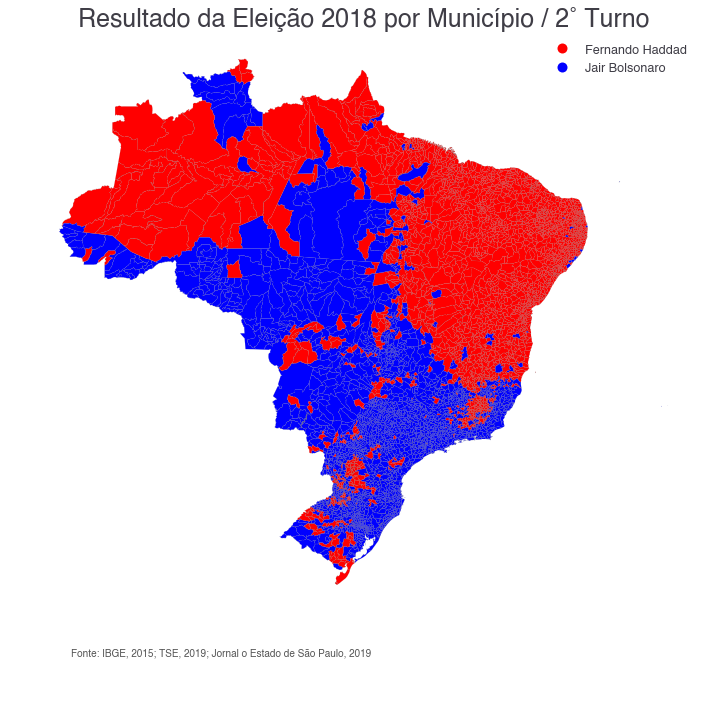

In [27]:
from matplotlib.colors import ListedColormap

# Cria referência para cores (False/0 = red, True/1 = blue)
cmap = ListedColormap(['red', 'blue'])

fig, ax = plt.subplots(1, figsize=(12, 12))

ax = df.plot(column='RESULTADO', cmap=cmap, legend=True, linewidth=0.1, ax=ax, edgecolor='grey')

ax.set_axis_off()
ax.set_title('Resultado da Eleição 2018 por Município / 2˚ Turno', fontdict={'fontsize': '25', 'fontweight': 3})

ax.annotate('Fonte: IBGE, 2015; TSE, 2019; Jornal o Estado de São Paulo, 2019',
           xy=(0.1, 0.08), xycoords='figure fraction', horizontalalignment='left',
           verticalalignment='top', fontsize=10, color='#555555')

leg = ax.get_legend()
leg.get_texts()[0].set_text('Fernando Haddad')
leg.get_texts()[1].set_text('Jair Bolsonaro')

plt.show()